<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,101.644254,274.306532,178.788321,95.518211
1,0.0,1.0,44.810190,46.967683,81.913998,132.184945,315.876815,134.154266,181.722548
2,0.0,2.0,89.719961,65.800482,63.419557,336.372023,565.312023,203.549594,361.762429
3,0.0,3.0,99.969317,45.799765,35.667810,154.519796,345.956688,186.231764,159.724924
4,0.0,4.0,33.611377,56.777825,62.400649,47.339984,210.129835,26.212237,183.917598
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,344.319339,517.305557,262.291752,255.013804
59996,999.0,56.0,70.765481,74.589813,42.649245,-263.574413,-65.569875,190.223063,-255.792938
59997,999.0,57.0,88.257994,25.363246,45.498839,197.510434,366.630513,113.978734,252.651779
59998,999.0,58.0,79.065187,78.384294,96.039341,548.115842,811.604664,103.531616,708.073048


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    42.180882  29.019275  91.462121  101.644254  274.306532   
      1.0    44.810190  46.967683  81.913998  132.184945  315.876815   
      2.0    89.719961  65.800482  63.419557  336.372023  565.312023   
      3.0    99.969317  45.799765  35.667810  154.519796  345.956688   
      4.0    33.611377  56.777825  62.400649   47.339984  210.129835   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.113612  88.414639  21.457966  344.319339  517.305557   
      56.0   70.765481  74.589813  42.649245 -263.574413  -65.569875   
      57.0   88.257994  25.363246  45.498839  197.510434  366.630513   
      58.0   79.065187  78.384294  96.039341  548.115842  811.604664   
      59.0   50.245971  32.716929  70.580102   43.810703  207.353704   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    178.788321   95.518211  
      1.0    134.154266  181.722548  
      2.0    203.549594  361.762429  
      3.0    186.231764  159.724924  
      4.0     26.212237  183.917598  
...                 ...         ...  
999.0 55.0   262.291752  255.013804  
      56.0   190.223063 -255.792938  
      57.0   113.978734  252.651779  
      58.0   103.531616  708.073048  
      59.0   149.433533   57.920171  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    42.180882  29.019275  91.462121  101.644254  274.306532   
      1.0    44.810190  46.967683  81.913998  132.184945  315.876815   
      2.0    89.719961  65.800482  63.419557  336.372023  565.312023   
      3.0    99.969317  45.799765  35.667810  154.519796  345.956688   
      4.0    33.611377  56.777825  62.400649   47.339984  210.129835   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.113612  88.414639  21.457966  344.319339  517.305557   
      56.0   70.765481  74.589813  42.649245 -263.574413  -65.569875   
      57.0   88.257994  25.363246  45.498839  197.510434  366.630513   
      58.0   79.065187  78.384294  96.039341  548.115842  811.604664   
      59.0   50.245971  32.716929  70.580102   43.810703  207.353704   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    178.788321   95.518211  
      1.0    134.154266  181.722548  
      2.0    203.549594  361.762429  
      3.0    186.231764  159.724924  
      4.0     26.212237  183.917598  
...                 ...         ...  
999.0 55.0   262.291752  255.013804  
      56.0   190.223063 -255.792938  
      57.0   113.978734  252.651779  
      58.0   103.531616  708.073048  
      59.0   149.433533   57.920171  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,101.644254,274.306532,178.788321,95.518211
1,0.0,1.0,44.810190,46.967683,81.913998,132.184945,315.876815,134.154266,181.722548
2,0.0,2.0,89.719961,65.800482,63.419557,336.372023,565.312023,203.549594,361.762429
3,0.0,3.0,99.969317,45.799765,35.667810,154.519796,345.956688,186.231764,159.724924
4,0.0,4.0,33.611377,56.777825,62.400649,47.339984,210.129835,26.212237,183.917598
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,344.319339,517.305557,262.291752,255.013804
59996,999.0,56.0,70.765481,74.589813,42.649245,-263.574413,-65.569875,190.223063,-255.792938
59997,999.0,57.0,88.257994,25.363246,45.498839,197.510434,366.630513,113.978734,252.651779
59998,999.0,58.0,79.065187,78.384294,96.039341,548.115842,811.604664,103.531616,708.073048


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    42.180882  29.019275  91.462121  101.644254  274.306532   
      1.0    44.810190  46.967683  81.913998  132.184945  315.876815   
      2.0    89.719961  65.800482  63.419557  336.372023  565.312023   
      3.0    99.969317  45.799765  35.667810  154.519796  345.956688   
      4.0    33.611377  56.777825  62.400649   47.339984  210.129835   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.113612  88.414639  21.457966  344.319339  517.305557   
      56.0   70.765481  74.589813  42.649245 -263.574413  -65.569875   
      57.0   88.257994  25.363246  45.498839  197.510434  366.630513   
      58.0   79.065187  78.384294  96.039341  548.115842  811.604664   
      59.0   50.245971  32.716929  70.580102   43.810703  207.353704   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    178.788321   95.518211  
      1.0    134.154266  181.722548  
      2.0    203.549594  361.762429  
      3.0    186.231764  159.724924  
      4.0     26.212237  183.917598  
...                 ...         ...  
999.0 55.0   262.291752  255.013804  
      56.0   190.223063 -255.792938  
      57.0   113.978734  252.651779  
      58.0   103.531616  708.073048  
      59.0   149.433533   57.920171  

[60000 rows x 7 columns]

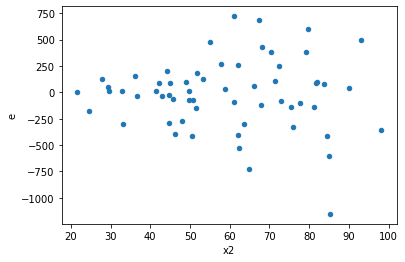

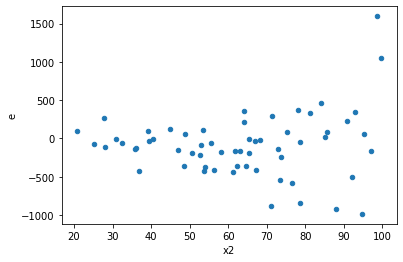

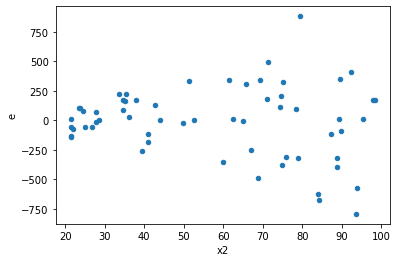

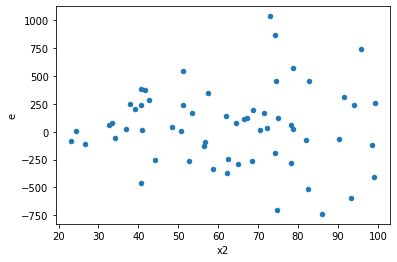

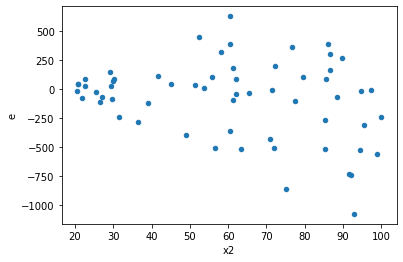

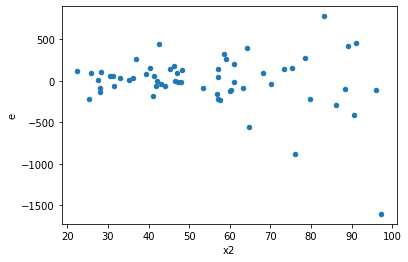

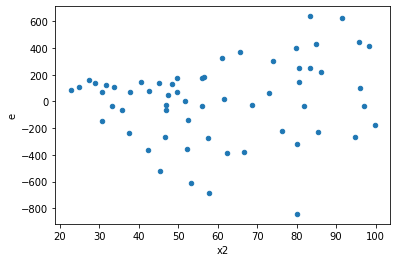

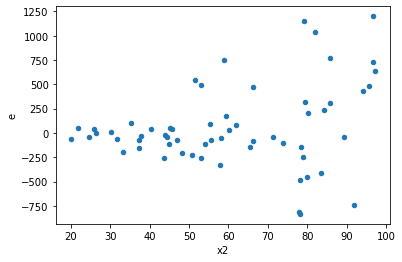

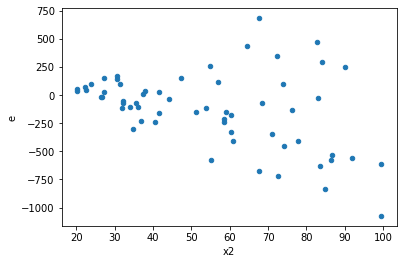

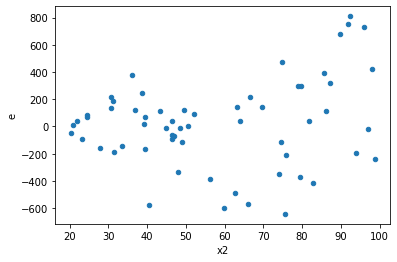

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,30.0,24.0,2978709.53839897,3706196.5535467463,99290.31794663233,154424.85639778108,1.5552861506676117,0.27048881326897556,0.8647555933655122,0.13524440663448778,Reject005=1 : Homoscedasticity
1.0,34.0,20.0,4513458.742719974,2749528.9812227,132748.78655058748,137476.449061135,1.0356136024546327,0.9583605159676194,0.5208197420161903,0.4791802579838097,Reject005=1 : Homoscedasticity
3.0,32.0,22.0,5979407.564477137,4458005.11243652,186856.48638991054,202636.59601984182,1.0844504246804854,0.8569873403140869,0.5715063298429566,0.4284936701570434,Reject005=1 : Homoscedasticity
7.0,19.0,35.0,1233993.8231253314,4682301.544805891,64947.04332238586,133780.04413731117,2.059832708215064,0.06261230412375585,0.9686938479381221,0.03130615206187792,Reject005=1 : Homoscedasticity
8.0,23.0,31.0,1057192.2901741245,5854111.5614510225,45964.88218148368,188842.30843390396,4.108404056999334,0.00032163374596305694,0.9998391831270185,0.00016081687298152847,Reject005=0 : Heteroscedasticity
10.0,26.0,28.0,2426536.3802363877,3819858.5310918353,93328.32231678415,136423.51896756556,1.4617590414247827,0.3267245744324041,0.836637712783798,0.16336228721620205,Reject005=1 : Homoscedasticity
11.0,33.0,21.0,2412495.2971752277,5545257.924615591,73105.91809621901,264059.901172171,3.6120181245056817,0.00301153714673541,0.9984942314266323,0.001505768573367705,Reject005=0 : Heteroscedasticity
12.0,32.0,22.0,1880157.810459729,2742338.3178764987,58754.93157686653,124651.74172165903,2.1215536870906324,0.06937106039528618,0.9653144698023569,0.03468553019764309,Reject005=1 : Homoscedasticity
18.0,31.0,23.0,1926973.8293420847,3104089.615654025,62160.446107809184,134960.41807191414,2.1711623149847235,0.05801170661982136,0.9709941466900893,0.02900585330991068,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,2978709.53839897,3706196.5535467463,99290.31794663233,154424.85639778108,1.5552861506676117,0.27048881326897556,Reject005=1 : Homoscedasticity
1.0,34.0,20.0,4513458.742719974,2749528.9812227,132748.78655058748,137476.449061135,1.0356136024546327,0.9583605159676194,Reject005=1 : Homoscedasticity
2.0,27.0,27.0,9229537.886571445,2541086.568513205,341834.73653968313,94114.31735234092,0.27532110488547534,0.0013010719192241855,Reject005=0 : Heteroscedasticity
3.0,32.0,22.0,5979407.564477137,4458005.11243652,186856.48638991054,202636.59601984182,1.0844504246804854,0.8569873403140869,Reject005=1 : Homoscedasticity
4.0,23.0,31.0,4222987.73201687,2132593.7725359485,183608.16226160302,68793.34750115963,0.37467477836384844,0.017386078086214965,Reject005=0 : Heteroscedasticity
5.0,13.0,41.0,2005868.0238594948,3860398.0520068347,154297.54029688422,94156.05004894719,0.6102239210539672,0.33721282590396845,Reject005=1 : Homoscedasticity
6.0,22.0,32.0,1868488.41075191,1453686.720869504,84931.29139781409,45427.710027172,0.5348760071760923,0.12921926715403587,Reject005=1 : Homoscedasticity
7.0,19.0,35.0,1233993.8231253314,4682301.544805891,64947.04332238586,133780.04413731117,2.059832708215064,0.06261230412375585,Reject005=1 : Homoscedasticity
8.0,23.0,31.0,1057192.2901741245,5854111.5614510225,45964.88218148368,188842.30843390396,4.108404056999334,0.00032163374596305694,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    525
Reject005=1 : Homoscedasticity      475
Name: Result_test, dtype: int64